# 타 채널 카테고리로 카테고리를 분류하는 모델
해당 모델은 GPU로 학습을 하는 모델이며 document에 상품명을 입력하면 상품명을 통해서 카테고리를 분류하는 모델이 됩니다.

# 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [17]:
train_data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/colab_data/classification_result_data/C2C_train.csv')
train_data2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/colab_data/classification_result_data/coupang C2C.csv')
train_data3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/colab_data/11bunga_data.csv')
train_data3["document"] = train_data3["11st_category"]
train_data1["document"] = train_data1["classification"]
train_data2["document"] = train_data2["coupang_category"]
train_data2
train_data2["middle_classification"] = train_data2["naver_category"]
train_data3["middle_classification"] = train_data3["naver_category"]
train_data3 = train_data3[["document", "middle_classification"]]
train_data2 = train_data2[["document", "middle_classification"]]
train_data1 = train_data1[["document", "middle_classification"]]
train_data3 = train_data3.drop_duplicates(["document"])
train_data = pd.concat([train_data1, train_data2, train_data3])
train_data

,document,middle_classification
0,화장품/미용 베이스메이크업 컨실러,화장품/미용 베이스메이크업
1,출산/육아 지갑 동잡화지갑,출산/육아 유아동잡화
2,출산/육아 모자 동잡화모자,출산/육아 유아동잡화
3,출산/육아 장갑 동잡화장갑,출산/육아 유아동잡화
4,출산/육아 유아동잡화 귀마개,출산/육아 유아동잡화
...,...,...
16446,도서/여행/취미 관상어/수족관 일체형수조,생활/건강 반려동물
16473,도서/여행/취미 조류용품 모이통/식기,생활/건강 반려동물
16602,도서/여행/취미 꽃배달 카네이션,여가/생활편의 생활편의
16620,도서/여행/취미 악기 관악기,생활/건강 악기


In [18]:
label_list = list(train_data.middle_classification.unique())
data_label = list(train_data["middle_classification"])
mapping_data = []
for i in range(len(label_list)):
    mapping_data.append([i,label_list[i]])
print(mapping_data)
for x in range(len(data_label)):
    for y in mapping_data:
        if (data_label[x] == y[1]):
            data_label[x] = y[0]
train_data["label"] = data_label


train_data

[[0, '화장품/미용 베이스메이크업'], [1, '출산/육아 유아동잡화'], [2, '출산/육아 수영복/용품'], [3, '출산/육아 유아발육용품'], [4, '출산/육아 완구/매트'], [5, '생활/건강 수집품'], [6, '생활/건강 반려동물'], [7, '화장품/미용 색조메이크업'], [8, '화장품/미용 네일케어'], [9, '화장품/미용 바디케어'], [10, '출산/육아 유아동의류'], [11, '생활/건강 자동차용품'], [12, '패션잡화 시계'], [13, '패션잡화 주얼리'], [14, '패션잡화 패션소품'], [15, '화장품/미용 스킨케어'], [16, '화장품/미용 선케어'], [17, '화장품/미용 클렌징'], [18, '화장품/미용 마스크/팩'], [19, '출산/육아 기저귀'], [20, '출산/육아 유아가구'], [21, '출산/육아 이유식'], [22, '패션의류 여성의류'], [23, '출산/육아 임산부용품'], [24, '출산/육아 유아침구'], [25, '패션잡화 지갑'], [26, '패션잡화 벨트'], [27, '패션잡화 모자'], [28, '패션잡화 장갑'], [29, '패션잡화 선글라스/안경테'], [30, '패션잡화 헤어액세서리'], [31, '출산/육아 안전용품'], [32, '출산/육아 위생/건강용품'], [33, '출산/육아 구강청결용품'], [34, '출산/육아 유아세제'], [35, '생활/건강 화방용품'], [36, '패션잡화 여성가방'], [37, '패션잡화 남성가방'], [38, '패션잡화 여행용가방/소품'], [39, '패션잡화 남성신발'], [40, '패션잡화 신발용품'], [41, '출산/육아 수유용품'], [42, '출산/육아 분유'], [43, '출산/육아 유모차'], [44, '출산/육아 외출용품'], [45, '출산/육아 목욕용품'], [46, '출산/육아 스킨/바디용품'], [47, '출산/육아 아기간식'], [48, '패션잡화 여성신발'], [49, '패션의류 여성언더웨어/잠옷'],

,document,middle_classification,label
0,화장품/미용 베이스메이크업 컨실러,화장품/미용 베이스메이크업,0
1,출산/육아 지갑 동잡화지갑,출산/육아 유아동잡화,1
2,출산/육아 모자 동잡화모자,출산/육아 유아동잡화,1
3,출산/육아 장갑 동잡화장갑,출산/육아 유아동잡화,1
4,출산/육아 유아동잡화 귀마개,출산/육아 유아동잡화,1
...,...,...,...
16446,도서/여행/취미 관상어/수족관 일체형수조,생활/건강 반려동물,6
16473,도서/여행/취미 조류용품 모이통/식기,생활/건강 반려동물,6
16602,도서/여행/취미 꽃배달 카네이션,여가/생활편의 생활편의,164
16620,도서/여행/취미 악기 관악기,생활/건강 악기,55


#testset 분리

In [19]:
train_data = train_data[["document", "label"]]
train_data = train_data.sample(frac=1)
train_data
test_data = train_data
train_data = train_data[:7000]
test_data

,document,label
588,생활용품 수납 정리 욕실정리용품,63
1061,브랜드패션 브랜드 여성가방 토트백,36
3807,교육/문화용품 문구/사무용품 팬시 파티용품,65
619,홈인테리어 싱글하우스 의자 소파,102
4902,일상용품 반려동물 강아지 건강/관리용품 칫솔,6
...,...,...
5210,일상용품 화장품 영유아용화장품 영유아용파우더,46
429,주방용품 보온 보냉용품 보온 보냉주전자,57
4717,패션잡화 벨트 멜빵/여성벨트 여성벨트,26
5470,교육/문화용품 e-Book 일반서적 기타일반서적,131


In [ ]:
print('훈련용 데이터 개수 :',len(train_data))

훈련용 데이터 개수 : 7500


In [ ]:
train_data[:5] # 상위 5개 출력

,document,label
3338,신선식품 농산물 채소류 토란,151
2826,디지털/가전 음향가전 MD플레이어,112
1697,헬스 건강식품 꿀 프로폴리스 로얄젤리,147
3827,교육/문화용품 악기 학습악기 하모니카,55
395,가구/인테리어 커튼/블라인드 캐노피,54


In [ ]:
print('테스트용 데이터 개수 :',len(test_data))

테스트용 데이터 개수 : 1265


In [ ]:
test_data[:5]

,document,label
508,생활/건강 주방용품 냄비/솥압력솥,57
2391,패션잡화 여성신발 힐/펌프스웨딩슈즈,48
4809,패션잡화 패션소품 우산 자동우산,14
3510,일상용품 주방용품 저장용기 보온/보냉병,57
1386,생활/건강 문구/사무용품 앨범포켓식앨범,65


In [ ]:
train_data['document'].nunique(), train_data['label'].nunique()

(7440, 169)

In [ ]:
train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [ ]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 7440


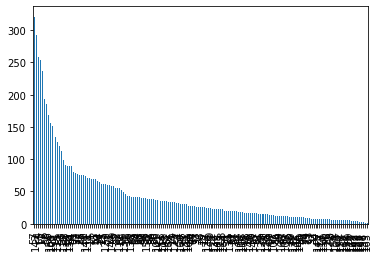

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.isnull().values.any())

False


In [ ]:
print(train_data.isnull().sum())

document    0
label       0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()]

,document,label


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data))

7440


# 토크나이저를 이용한 정수 인코딩

이미 학습해놓은 모델을 사용한다고 하면  

1. 토크나이저 (이 모델이 만들어졌을 당시에 '사과' 라는 단어가 36번이었다. 정보를 알기 위해)  
2. 모델  

이 두 가지를 로드해야 합니다.

In [5]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 11.4 MB/s 
     |████████████████████████████████| 596 kB 40.7 MB/s 
     |████████████████████████████████| 6.8 MB 48.4 MB/s 
     |████████████████████████████████| 67 kB 3.8 MB/s 
     |████████████████████████████████| 895 kB 72.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
import transformers

In [7]:
transformers.__version__

'4.16.2'

In [8]:
from transformers import BertTokenizerFast, BertModel, BertTokenizer
# tokenizer = BertTokenizer.from_pretrained('klue/bert-base')
tokenizer = BertTokenizer.from_pretrained('kykim/bert-kor-base')

Downloading:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/725 [00:00<?, ?B/s]

from transformers import BertTokenizerFast. 

tokenizer = BertTokenizerFast.from_pretrained("사용하고자 하는 모델 이름")

from transformers import TFBertForSequenceClassification  
model = TFBertForSequenceClassification.from_pretrained("사용하고자 하는 모델 이름", num_labels=클래스의 수(분류할 종류 개수), from_pt=True)

In [ ]:
X_train_list = train_data['document'].tolist()
X_test_list = test_data['document'].tolist()
y_train = train_data['label'].tolist()
y_test = test_data['label'].tolist()

In [ ]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [ ]:
print(X_train[0].tokens)

['[CLS]', '생활', '/', '건강', '문구', '/', '사무용', '##품', '제도', '##용품', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [ ]:
print(X_train[0].ids)

[2, 14686, 2017, 14274, 21877, 2017, 32441, 8218, 19787, 14927, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 데이터셋 생성 및 모델 학습

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [9]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('kykim/bert-kor-base', num_labels=len(mapping_data), from_pt=True)
# model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=len(mapping_data), from_pt=True)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

Downloading:   0%|          | 0.00/454M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 학습

In [ ]:

callback_earlystop = EarlyStopping(
    monitor="val_loss", 
    min_delta=0.001,
    patience=2)

model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=8, batch_size=32,
    validation_data = val_dataset.shuffle(10000).batch(64),
    callbacks = [callback_earlystop]
)


Epoch 1/8


/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:377: FutureWarning: The old compute_loss method is deprecated as it conflicts with the Keras compute_loss method added in TF 2.8. If you want the original HF compute_loss, please call hf_compute_loss() instead. From TF versions >= 2.8, or Transformers versions >= 5, calling compute_loss() will get the Keras method instead.
  return py_builtins.overload_of(f)(*args)


235/235 [==============================] - 133s 433ms/step - loss: 2.4808 - accuracy: 0.6085 - val_loss: 0.9420 - val_accuracy: 0.8870
Epoch 2/8
235/235 [==============================] - 97s 411ms/step - loss: 0.7025 - accuracy: 0.9180 - val_loss: 0.4406 - val_accuracy: 0.9399
Epoch 3/8
235/235 [==============================] - 96s 409ms/step - loss: 0.3577 - accuracy: 0.9519 - val_loss: 0.3039 - val_accuracy: 0.9518
Epoch 4/8
235/235 [==============================] - 96s 409ms/step - loss: 0.2158 - accuracy: 0.9691 - val_loss: 0.2511 - val_accuracy: 0.9581
Epoch 5/8
235/235 [==============================] - 96s 408ms/step - loss: 0.1369 - accuracy: 0.9816 - val_loss: 0.2460 - val_accuracy: 0.9518
Epoch 6/8
235/235 [==============================] - 96s 409ms/step - loss: 0.0986 - accuracy: 0.9859 - val_loss: 0.2341 - val_accuracy: 0.9557
Epoch 7/8
235/235 [==============================] - 96s 409ms/step - loss: 0.0749 - accuracy: 0.9889 - val_loss: 0.2299 - val_accuracy: 0.9557
E

In [ ]:
model.evaluate(val_dataset.batch(1024))

2/2 [==============================] - 4s 746ms/step - loss: 0.2256 - accuracy: 0.9557


[0.2255512773990631, 0.955731213092804]

# 모델 저장

In [ ]:
model.save_pretrained('/content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base')
tokenizer.save_pretrained('/content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base')

('/content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base/tokenizer_config.json',
 '/content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base/special_tokens_map.json',
 '/content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base/vocab.txt',
 '/content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base/added_tokens.json',
 '/content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base/tokenizer.json')

# 모델 로드 및 테스트

In [10]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained('/content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base')
loaded_model = TFBertForSequenceClassification.from_pretrained('/content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base')

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at /content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_75']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/My Drive/Colab Notebooks/model_C2C_final/bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions witho

# text_classifier에 값을 넣으면 예측 카테고리 순위 도출

In [ ]:
result = text_classifier("주방용품 랩 호일 키친타올 키친타올")
result_sort = sorted(result[0], key=lambda data : data["score"], reverse=True)
print("예측 값",mapping_data[int(result_sort[0]["label"][6:])][1])

예측 값 생활/건강 생활용품


In [24]:
list_check_data = []
count = 0
for i in range(len(list(test_data["document"]))):
    if (i % 10 == 0):
        print(i)
    result = text_classifier(test_data["document"].iloc[i])
    result_sort = sorted(result[0], key=lambda data : data["score"], reverse=True)
    result_df = pd.DataFrame(result_sort)
    if (int(result_sort[0]["label"][6:]) != test_data["label"].iloc[i]):
        list_check_data.append([test_data["document"].iloc[i], mapping_data[test_data["label"].iloc[i]][1], mapping_data[int(result_sort[0]["label"][6:])][1],result_df["score"].iloc[0] ,1])
        print("입력 카테고리",test_data["document"].iloc[i])
        print("실제 값",mapping_data[test_data["label"].iloc[i]][1])
        print("예측 값",mapping_data[int(result_sort[0]["label"][6:])][1])
        print("="*80)
        count += 1
    else:
        list_check_data.append([test_data["document"].iloc[i], mapping_data[test_data["label"].iloc[i]][1], mapping_data[int(result_sort[0]["label"][6:])][1],result_df["score"].iloc[0] ,0])
print("정답률 : ",1- (count/len(list(test_data["document"]))))

0
10
20
30
40
50
60
입력 카테고리 도서 음반 유아 어린이 만화 애니메이션
실제 값 생활/건강 DVD
예측 값 출산/육아 교구
70
80
90
100
110
120
130
140
150
160
170
입력 카테고리 생활용품 주방수납 잡화 주방세척도구
실제 값 생활/건강 수납/정리용품
예측 값 생활/건강 주방용품
180
입력 카테고리 출산 유아동 욕실용품 스킨케어 유아목욕용품
실제 값 출산/육아 목욕용품
예측 값 출산/육아 스킨/바디용품
190
200
210
220
230
240
250
260
270
280
290
입력 카테고리 문구 오피스 학용품 수업준비 음악시간
실제 값 생활/건강 악기
예측 값 생활/건강 음반
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
입력 카테고리 완구 취미 물놀이 계절완구 킥판 킥보드
실제 값 스포츠/레저 수영
예측 값 출산/육아 완구/매트
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
입력 카테고리 주방용품 주방잡화 음식물쓰레기통
실제 값 생활/건강 청소용품
예측 값 생활/건강 주방용품
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
입력 카테고리 출산/육아 벨트 트카시트용품차량안전벨트
실제 값 출산/육아 유아동잡화
예측 값 출산/육아 유아발육용품
880
890
900
910
920
930
940
950
입력 카테고리 일상용품 영유아용품 육아용품 영유아용머리/무릅보호대
실제 값 출산/육아 안전용품
예측 값 출산/육아 유아발육용품
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
입력 카테고리 생활용품 건강 의료용품 의약외품 상비용품
실제 값 생활/건강 의료용품
예측 값 생활/건강 생활용품
1

In [25]:
df_data = pd.DataFrame(list_check_data)
df_data

,0,1,2,3,4
0,생활용품 수납 정리 욕실정리용품,생활/건강 수납/정리용품,생활/건강 수납/정리용품,0.984689,0
1,브랜드패션 브랜드 여성가방 토트백,패션잡화 여성가방,패션잡화 여성가방,0.987270,0
2,교육/문화용품 문구/사무용품 팬시 파티용품,생활/건강 문구/사무용품,생활/건강 문구/사무용품,0.997413,0
3,홈인테리어 싱글하우스 의자 소파,가구/인테리어 거실가구,가구/인테리어 거실가구,0.962996,0
4,일상용품 반려동물 강아지 건강/관리용품 칫솔,생활/건강 반려동물,생활/건강 반려동물,0.997374,0
...,...,...,...,...,...
8760,일상용품 화장품 영유아용화장품 영유아용파우더,출산/육아 스킨/바디용품,출산/육아 스킨/바디용품,0.979177,0
8761,주방용품 보온 보냉용품 보온 보냉주전자,생활/건강 주방용품,생활/건강 주방용품,0.995886,0
8762,패션잡화 벨트 멜빵/여성벨트 여성벨트,패션잡화 벨트,패션잡화 벨트,0.965827,0
8763,교육/문화용품 e-Book 일반서적 기타일반서적,디지털/가전 학습기기,디지털/가전 학습기기,0.993400,0


In [27]:
df_data.to_csv("/content/drive/My Drive/Colab Notebooks/colab_data/111222.csv")